In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 전체 코드 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 요일별 노인 교통사고 사망자수

In [3]:
day_data = pd.read_excel('../[0]data/요일별_노인교통사고.xls')
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      56 non-null     object
 1   기준년도    55 non-null     object
 2   2019    55 non-null     object
 3   2019.1  55 non-null     object
 4   2019.2  55 non-null     object
 5   2019.3  55 non-null     object
 6   2019.4  55 non-null     object
 7   2019.5  55 non-null     object
 8   2019.6  55 non-null     object
 9   2019.7  55 non-null     object
dtypes: object(10)
memory usage: 4.5+ KB


In [4]:
day_data.dropna(inplace=True)

In [5]:
day_data.head()

,시도,기준년도,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7
0,시도,기준년도,합계,일,월,화,수,목,금,토
1,합계,사고건수,40645,4010,6426,6245,6090,5942,6443,5489
2,합계,사망자수,1523,127,263,228,229,234,254,188
3,합계,부상자수,44390,4508,6961,6793,6589,6467,6971,6101
4,서울,사고건수,5912,591,932,894,908,873,941,773


In [6]:
day_data.columns = day_data.iloc[0]

In [7]:
day_data.head()

,시도,기준년도,합계,일,월,화,수,목,금,토
0,시도,기준년도,합계,일,월,화,수,목,금,토
1,합계,사고건수,40645,4010,6426,6245,6090,5942,6443,5489
2,합계,사망자수,1523,127,263,228,229,234,254,188
3,합계,부상자수,44390,4508,6961,6793,6589,6467,6971,6101
4,서울,사고건수,5912,591,932,894,908,873,941,773


In [8]:
day_data.drop(index=0,axis=0,inplace=True)

In [9]:
day_data.head()

,시도,기준년도,합계,일,월,화,수,목,금,토
1,합계,사고건수,40645,4010,6426,6245,6090,5942,6443,5489
2,합계,사망자수,1523,127,263,228,229,234,254,188
3,합계,부상자수,44390,4508,6961,6793,6589,6467,6971,6101
4,서울,사고건수,5912,591,932,894,908,873,941,773
5,서울,사망자수,103,8,19,25,17,11,13,10


In [10]:
day_data = day_data[4::3]

In [11]:
day_data

,시도,기준년도,합계,일,월,화,수,목,금,토
5,서울,사망자수,103,8,19,25,17,11,13,10
8,부산,사망자수,53,7,6,9,5,10,8,8
11,대구,사망자수,44,5,12,5,7,1,6,8
14,인천,사망자수,50,4,10,8,9,7,6,6
17,광주,사망자수,25,3,3,2,6,3,7,1
20,대전,사망자수,34,2,7,4,5,7,7,2
23,울산,사망자수,17,4,2,3,4,3,0,1
26,세종,사망자수,8,2,2,1,1,0,0,2
29,경기,사망자수,222,13,37,26,27,45,41,33
32,강원,사망자수,77,3,16,18,9,12,12,7


In [12]:
day_data.index = day_data['시도']

In [13]:
del day_data['시도']

In [14]:
day_data

,기준년도,합계,일,월,화,수,목,금,토
시도,,,,,,,,,
서울,사망자수,103,8,19,25,17,11,13,10
부산,사망자수,53,7,6,9,5,10,8,8
대구,사망자수,44,5,12,5,7,1,6,8
인천,사망자수,50,4,10,8,9,7,6,6
광주,사망자수,25,3,3,2,6,3,7,1
대전,사망자수,34,2,7,4,5,7,7,2
울산,사망자수,17,4,2,3,4,3,0,1
세종,사망자수,8,2,2,1,1,0,0,2
경기,사망자수,222,13,37,26,27,45,41,33


In [15]:
Top3data_day = day_data.loc[['제주','전남','충남']]
Top3data_day

,기준년도,합계,일,월,화,수,목,금,토
시도,,,,,,,,,
제주,사망자수,31,2,8,6,3,5,7,0
전남,사망자수,177,16,32,15,29,30,29,26
충남,사망자수,149,14,31,25,20,23,23,13


In [16]:
del Top3data_day['합계']

In [17]:
del Top3data_day['기준년도']

In [18]:
Top3data_day.T.index
Top3data_day.T['제주'].values
Top3data_day.T['제주'][0]

Index(['일', '월', '화', '수', '목', '금', '토'], dtype='object', name=0)

array([2, 8, 6, 3, 5, 7, 0], dtype=object)

2

In [19]:
len(Top3data_day)

3

In [20]:
Top3data_day

,일,월,화,수,목,금,토
시도,,,,,,,
제주,2,8,6,3,5,7,0
전남,16,32,15,29,30,29,26
충남,14,31,25,20,23,23,13


In [21]:
Top3data_day.to_csv('../[0]data/0-5_요일_노인교통사고_사망자수_제주_전남_충남(결과).csv')

In [22]:
Top3data_day.T

시도,제주,전남,충남
0,,,
일,2,16,14
월,8,32,31
화,6,15,25
수,3,29,20
목,5,30,23
금,7,29,23
토,0,26,13


<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, '<요일별 노인 교통사고 사망자수>')

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

Text(0.1, 2, '2명')

Text(1.1, 8, '8명')

Text(2.1, 6, '6명')

Text(3.1, 3, '3명')

Text(4.1, 5, '5명')

Text(5.1, 7, '7명')

Text(6.1, 0, '0명')

Text(0.3, 16, '16명')

Text(1.3, 32, '32명')

Text(2.3, 15, '15명')

Text(3.3, 29, '29명')

Text(4.3, 30, '30명')

Text(5.3, 29, '29명')

Text(6.3, 26, '26명')

Text(0.5, 14, '14명')

Text(1.5, 31, '31명')

Text(2.5, 25, '25명')

Text(3.5, 20, '20명')

Text(4.5, 23, '23명')

Text(5.5, 23, '23명')

Text(6.5, 13, '13명')

Text(0.5, 0, '요일')

Text(0, 0.5, '')

([<matplotlib.axis.XTick at 0x7feeaa528a90>,
 [Text(0.30000000000000004, 0, '일'),
  Text(1.3, 0, '월'),
  Text(2.3000000000000003, 0, '화'),
  Text(3.3000000000000003, 0, '수'),
  Text(4.3, 0, '목'),
  Text(5.3, 0, '금'),
  Text(6.3, 0, '토')])

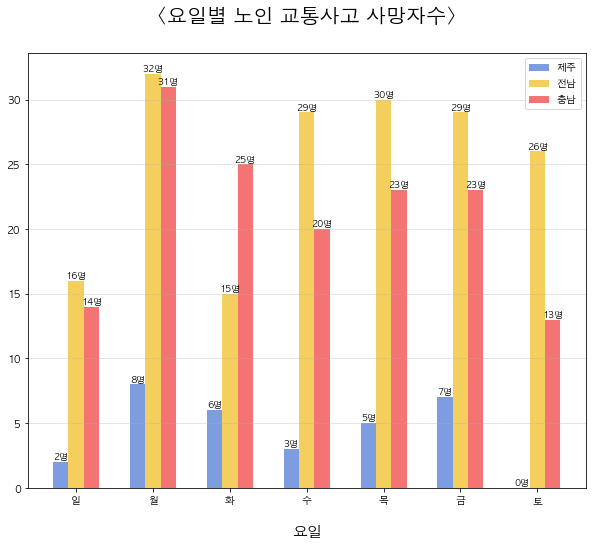

In [23]:
# 막대 그래프 bar(x, y, color = , alpha = )
# 변수 kor19_data

x = range(0,len(Top3data_day.columns))
n_data=len(Top3data_day.T)
index=np.arange(n_data)
barWidth = 0.2

plt.figure(figsize=(10,8))
plt.title('<요일별 노인 교통사고 사망자수>',fontsize=20,pad=30,fontweight="bold")

plt.bar(index, Top3data_day.T['제주'], color='#5B85D9', align='edge', width=barWidth, label='제주',alpha=0.8)
plt.bar(index+barWidth, Top3data_day.T['전남'], color='#F2C335',align='edge', width=barWidth, label='전남',alpha=0.8)
plt.bar(index+barWidth+barWidth, Top3data_day.T['충남'], color='#F25050',align='edge', width=barWidth, label='충남',alpha=0.8)

plt.grid(True, axis='y', alpha=0.4)

for i, v in enumerate(x):
    plt.text(v+0.1, Top3data_day.T['제주'].values[i], str(Top3data_day.T['제주'][i])+'명',                 
             fontsize = 9, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')

for i, v in enumerate(x):
    plt.text(v+0.3, Top3data_day.T['전남'].values[i], str(Top3data_day.T['전남'][i])+'명',                 
             fontsize = 9, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')

for i, v in enumerate(x):
    plt.text(v+0.5, Top3data_day.T['충남'].values[i], str(Top3data_day.T['충남'][i])+'명',                 
             fontsize = 9, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
    
    
plt.xlabel('요일',labelpad=20,fontsize=15)
plt.ylabel('',labelpad=15,fontsize=15)

plt.xticks(index+barWidth+0.1, Top3data_day.T.index)
plt.legend()


plt.show()

# 월별 노인 교통사고 사망자수

In [24]:
month_data = pd.read_excel('../[0]data/월별_노인교통사고.xls')
month_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시도       56 non-null     object
 1   기준년도     55 non-null     object
 2   2019     55 non-null     object
 3   2019.1   55 non-null     object
 4   2019.2   55 non-null     object
 5   2019.3   55 non-null     object
 6   2019.4   55 non-null     object
 7   2019.5   55 non-null     object
 8   2019.6   55 non-null     object
 9   2019.7   55 non-null     object
 10  2019.8   55 non-null     object
 11  2019.9   55 non-null     object
 12  2019.10  55 non-null     object
 13  2019.11  55 non-null     object
 14  2019.12  55 non-null     object
dtypes: object(15)
memory usage: 6.7+ KB


In [25]:
month_data.dropna(inplace=True)

In [26]:
month_data.columns = month_data.iloc[0]

In [27]:
month_data.drop(index=0,axis=0,inplace=True)

In [28]:
month_data = month_data[4::3]

In [29]:
month_data

,시도,기준년도,합계,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
5,서울,사망자수,103,10,6,9,5,9,4,9,9,12,17,5,8
8,부산,사망자수,53,7,4,2,2,6,3,4,4,2,5,8,6
11,대구,사망자수,44,6,4,3,2,4,2,4,4,2,2,8,3
14,인천,사망자수,50,8,2,3,5,6,4,3,1,4,7,4,3
17,광주,사망자수,25,1,1,1,1,1,6,2,5,1,1,4,1
20,대전,사망자수,34,3,3,4,3,3,1,6,3,3,1,1,3
23,울산,사망자수,17,2,1,3,0,0,2,0,0,2,4,0,3
26,세종,사망자수,8,0,0,2,1,0,2,1,1,0,0,1,0
29,경기,사망자수,222,27,19,16,23,24,18,10,12,20,17,17,19
32,강원,사망자수,77,6,4,5,9,8,1,8,2,15,7,6,6


In [30]:
month_data.index = month_data['시도']

In [31]:
del month_data['시도']

In [32]:
Top3data_month = month_data.loc[['제주','전남','충남']]
Top3data_month

,기준년도,합계,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
시도,,,,,,,,,,,,,,
제주,사망자수,31,5,1,6,1,1,3,2,4,2,2,3,1
전남,사망자수,177,12,14,9,20,15,12,12,15,12,21,18,17
충남,사망자수,149,13,8,7,11,10,13,11,13,11,21,17,14


In [33]:
del Top3data_month['기준년도']
del Top3data_month['합계']

In [34]:
Top3data_month
# Top3data_month.T['제주'].values

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
시도,,,,,,,,,,,,
제주,5,1,6,1,1,3,2,4,2,2,3,1
전남,12,14,9,20,15,12,12,15,12,21,18,17
충남,13,8,7,11,10,13,11,13,11,21,17,14


In [35]:
Top3data_month.to_csv('../[0]data/0-5_요일_노인교통사고_사망자수_제주_전남_충남(결과).csv.csv')

In [36]:
Top3data_month.T

시도,제주,전남,충남
0,,,
01월,5,12,13
02월,1,14,8
03월,6,9,7
04월,1,20,11
05월,1,15,10
06월,3,12,13
07월,2,12,11
08월,4,15,13
09월,2,12,11


<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, '<월별 노인 교통사고 사망자수>')

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

Text(0.1, 5, '5명')

Text(1.1, 1, '1명')

Text(2.1, 6, '6명')

Text(3.1, 1, '1명')

Text(4.1, 1, '1명')

Text(5.1, 3, '3명')

Text(6.1, 2, '2명')

Text(7.1, 4, '4명')

Text(8.1, 2, '2명')

Text(9.1, 2, '2명')

Text(10.1, 3, '3명')

Text(11.1, 1, '1명')

Text(0.3, 12, '12명')

Text(1.3, 14, '14명')

Text(2.3, 9, '9명')

Text(3.3, 20, '20명')

Text(4.3, 15, '15명')

Text(5.3, 12, '12명')

Text(6.3, 12, '12명')

Text(7.3, 15, '15명')

Text(8.3, 12, '12명')

Text(9.3, 21, '21명')

Text(10.3, 18, '18명')

Text(11.3, 17, '17명')

Text(0.5, 13, '13명')

Text(1.5, 8, '8명')

Text(2.5, 7, '7명')

Text(3.5, 11, '11명')

Text(4.5, 10, '10명')

Text(5.5, 13, '13명')

Text(6.5, 11, '11명')

Text(7.5, 13, '13명')

Text(8.5, 11, '11명')

Text(9.5, 21, '21명')

Text(10.5, 17, '17명')

Text(11.5, 14, '14명')

Text(0.5, 0, '월별')

Text(0, 0.5, '')

([<matplotlib.axis.XTick at 0x7feec0ef2130>,
 [Text(0.30000000000000004, 0, '01월'),
  Text(1.3, 0, '02월'),
  Text(2.3000000000000003, 0, '03월'),
  Text(3.3000000000000003, 0, '04월'),
  Text(4.3, 0, '05월'),
  Text(5.3, 0, '06월'),
  Text(6.3, 0, '07월'),
  Text(7.3, 0, '08월'),
  Text(8.299999999999999, 0, '09월'),
  Text(9.299999999999999, 0, '10월'),
  Text(10.299999999999999, 0, '11월'),
  Text(11.299999999999999, 0, '12월')])

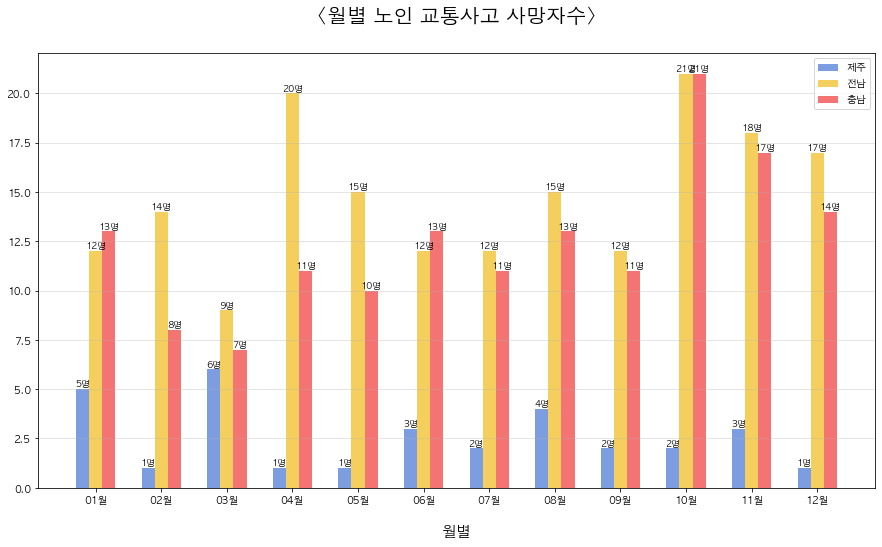

In [37]:
# 막대 그래프 bar(x, y, color = , alpha = )
# 변수 kor19_data

x = range(0,len(Top3data_month.columns))
n_data=len(Top3data_month.T)
index=np.arange(n_data)
barWidth = 0.2

plt.figure(figsize=(15,8))
plt.title('<월별 노인 교통사고 사망자수>',fontsize=20,pad=30,fontweight="bold")

plt.bar(index, Top3data_month.T['제주'], color='#5B85D9', align='edge', width=barWidth, label='제주',alpha=0.8)
plt.bar(index+barWidth, Top3data_month.T['전남'], color='#F2C335',align='edge', width=barWidth, label='전남',alpha=0.8)
plt.bar(index+barWidth+barWidth, Top3data_month.T['충남'], color='#F25050',align='edge', width=barWidth, label='충남',alpha=0.8)

plt.grid(True, axis='y', alpha=0.4)

for i, v in enumerate(x):
    plt.text(v+0.1, Top3data_month.T['제주'].values[i], str(Top3data_month.T['제주'][i])+'명',                 
             fontsize = 9, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')

for i, v in enumerate(x):
    plt.text(v+0.3, Top3data_month.T['전남'].values[i], str(Top3data_month.T['전남'][i])+'명',                 
             fontsize = 9, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')

for i, v in enumerate(x):
    plt.text(v+0.5, Top3data_month.T['충남'].values[i], str(Top3data_month.T['충남'][i])+'명',                 
             fontsize = 9, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
    
    
plt.xlabel('월별',labelpad=20,fontsize=15)
plt.ylabel('',labelpad=15,fontsize=15)

plt.xticks(index+barWidth+0.1, Top3data_month.T.index)
plt.legend()


plt.show()

# 시간대별 노인 교통사고 사망자수

In [38]:
time_data = pd.read_excel('../[0]data/시간대별_노인교통사고.xls')
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시도       56 non-null     object
 1   기준년도     55 non-null     object
 2   2019     55 non-null     object
 3   2019.1   55 non-null     object
 4   2019.2   55 non-null     object
 5   2019.3   55 non-null     object
 6   2019.4   55 non-null     object
 7   2019.5   55 non-null     object
 8   2019.6   55 non-null     object
 9   2019.7   55 non-null     object
 10  2019.8   55 non-null     object
 11  2019.9   55 non-null     object
 12  2019.10  55 non-null     object
 13  2019.11  55 non-null     object
 14  2019.12  55 non-null     object
dtypes: object(15)
memory usage: 6.7+ KB


In [39]:
time_data.dropna(inplace=True)

In [40]:
time_data.head()

,시도,기준년도,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9,2019.10,2019.11,2019.12
0,시도,기준년도,합계,0시~2시,2시~4시,4시~6시,6시~8시,8시~10시,10시~12시,12시~14시,14시~16시,16시~18시,18시~20시,20시~22시,22시~24시
1,합계,사고건수,40645,674,426,1366,2781,5199,6062,5491,5768,5385,4315,2144,1034
2,합계,사망자수,1523,22,19,93,153,170,196,155,189,167,213,106,40
3,합계,부상자수,44390,688,443,1421,2963,5688,6769,6241,6434,5945,4532,2210,1056
4,서울,사고건수,5912,194,113,298,378,619,822,697,772,769,624,388,238


In [41]:
time_data.columns = time_data.iloc[0]

In [42]:
time_data.drop(index=0,axis=0,inplace=True)

In [43]:
time_data.head()

,시도,기준년도,합계,0시~2시,2시~4시,4시~6시,6시~8시,8시~10시,10시~12시,12시~14시,14시~16시,16시~18시,18시~20시,20시~22시,22시~24시
1,합계,사고건수,40645,674,426,1366,2781,5199,6062,5491,5768,5385,4315,2144,1034
2,합계,사망자수,1523,22,19,93,153,170,196,155,189,167,213,106,40
3,합계,부상자수,44390,688,443,1421,2963,5688,6769,6241,6434,5945,4532,2210,1056
4,서울,사고건수,5912,194,113,298,378,619,822,697,772,769,624,388,238
5,서울,사망자수,103,6,4,14,14,5,10,10,14,6,6,8,6


In [44]:
time_data = time_data[4::3]
time_data.head()

,시도,기준년도,합계,0시~2시,2시~4시,4시~6시,6시~8시,8시~10시,10시~12시,12시~14시,14시~16시,16시~18시,18시~20시,20시~22시,22시~24시
5,서울,사망자수,103,6,4,14,14,5,10,10,14,6,6,8,6
8,부산,사망자수,53,3,1,5,6,6,6,8,5,5,3,4,1
11,대구,사망자수,44,1,2,4,6,4,5,5,5,7,0,2,3
14,인천,사망자수,50,1,0,3,4,6,4,5,9,7,2,5,4
17,광주,사망자수,25,0,1,3,2,4,4,0,4,0,2,5,0


In [45]:
time_data.index = time_data['시도']

In [46]:
del time_data['시도']
del time_data['기준년도']
del time_data['합계']

In [47]:
time_data

,0시~2시,2시~4시,4시~6시,6시~8시,8시~10시,10시~12시,12시~14시,14시~16시,16시~18시,18시~20시,20시~22시,22시~24시
시도,,,,,,,,,,,,
서울,6,4,14,14,5,10,10,14,6,6,8,6
부산,3,1,5,6,6,6,8,5,5,3,4,1
대구,1,2,4,6,4,5,5,5,7,0,2,3
인천,1,0,3,4,6,4,5,9,7,2,5,4
광주,0,1,3,2,4,4,0,4,0,2,5,0
대전,1,0,2,4,4,3,3,2,4,2,7,2
울산,0,0,2,4,1,3,1,2,0,2,1,1
세종,0,0,0,1,0,2,1,1,0,0,3,0
경기,5,2,15,26,23,27,22,25,27,26,15,9


In [48]:
Top3data_time = time_data.loc[['제주','전남','충남']]
Top3data_time

,0시~2시,2시~4시,4시~6시,6시~8시,8시~10시,10시~12시,12시~14시,14시~16시,16시~18시,18시~20시,20시~22시,22시~24시
시도,,,,,,,,,,,,
제주,0,0,0,5,5,2,3,4,4,3,4,1
전남,0,2,5,17,24,26,17,29,17,34,6,0
충남,1,0,6,15,21,21,12,13,15,32,10,3


In [49]:
Top3data_time.to_csv('../[0]data/0-5_시간_노인교통사고_사망자수_제주_전남_충남(결과).csv')

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, '<시간별 노인 교통사고 사망자수>')

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

<BarContainer object of 12 artists>

Text(0.5, 0, '시간별')

Text(0, 0.5, '')

([<matplotlib.axis.XTick at 0x7feec0d77d00>,
 [Text(0, 0, '0시~2시'),
  Text(1, 0, '2시~4시'),
  Text(2, 0, '4시~6시'),
  Text(3, 0, '6시~8시'),
  Text(4, 0, '8시~10시'),
  Text(5, 0, '10시~12시'),
  Text(6, 0, '12시~14시'),
  Text(7, 0, '14시~16시'),
  Text(8, 0, '16시~18시'),
  Text(9, 0, '18시~20시'),
  Text(10, 0, '20시~22시'),
  Text(11, 0, '22시~24시')])

Text(0, 0, '0명')

Text(1, 0, '0명')

Text(2, 0, '0명')

Text(3, 5, '5명')

Text(4, 5, '5명')

Text(5, 2, '2명')

Text(6, 3, '3명')

Text(7, 4, '4명')

Text(8, 4, '4명')

Text(9, 3, '3명')

Text(10, 4, '4명')

Text(11, 1, '1명')

Text(0.2, 0, '0명')

Text(1.2, 2, '2명')

Text(2.2, 5, '5명')

Text(3.2, 17, '17명')

Text(4.2, 24, '24명')

Text(5.2, 26, '26명')

Text(6.2, 17, '17명')

Text(7.2, 29, '29명')

Text(8.2, 17, '17명')

Text(9.2, 34, '34명')

Text(10.2, 6, '6명')

Text(11.2, 0, '0명')

Text(0.4, 1, '1명')

Text(1.4, 0, '0명')

Text(2.4, 6, '6명')

Text(3.4, 15, '15명')

Text(4.4, 21, '21명')

Text(5.4, 21, '21명')

Text(6.4, 12, '12명')

Text(7.4, 13, '13명')

Text(8.4, 15, '15명')

Text(9.4, 32, '32명')

Text(10.4, 10, '10명')

Text(11.4, 3, '3명')

([<matplotlib.axis.XTick at 0x7feec0d77d00>,
 [Text(0.30000000000000004, 0, '0시~2시'),
  Text(1.3, 0, '2시~4시'),
  Text(2.3000000000000003, 0, '4시~6시'),
  Text(3.3000000000000003, 0, '6시~8시'),
  Text(4.3, 0, '8시~10시'),
  Text(5.3, 0, '10시~12시'),
  Text(6.3, 0, '12시~14시'),
  Text(7.3, 0, '14시~16시'),
  Text(8.299999999999999, 0, '16시~18시'),
  Text(9.299999999999999, 0, '18시~20시'),
  Text(10.299999999999999, 0, '20시~22시'),
  Text(11.299999999999999, 0, '22시~24시')])

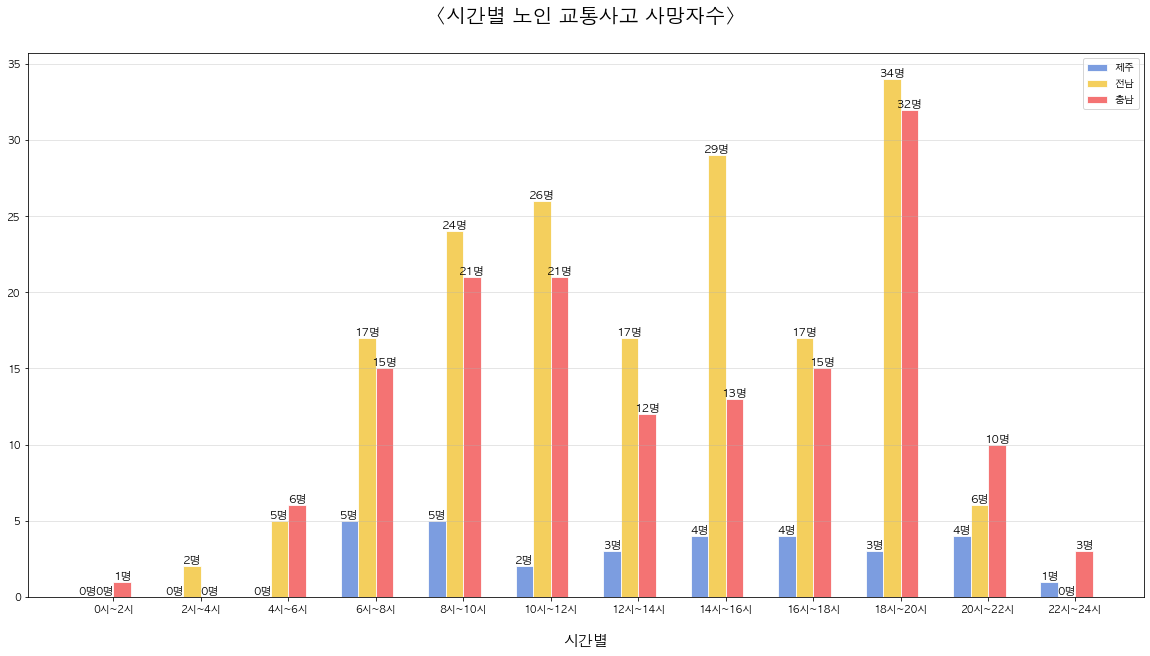

In [50]:
plt.figure(figsize=(20,10))

n_data=len(Top3data_time.T) # 12
index=np.arange(n_data) # 배열

barWidth = 0.2

plt.title('<시간별 노인 교통사고 사망자수>',fontsize=20,pad=30,fontweight="bold")

x = range(0,len(Top3data_time.columns))

plt.bar(index, Top3data_time.T['제주'], color='#5B85D9', width=barWidth, edgecolor='white', label='제주',alpha=0.8)
plt.bar(index+barWidth, Top3data_time.T['전남'], color='#F2C335', width=barWidth, edgecolor='white', label='전남',alpha=0.8)
plt.bar(index+barWidth+barWidth, Top3data_time.T['충남'], color='#F25050', width=barWidth, edgecolor='white', label='충남',alpha=0.8)
 
plt.grid(True, axis='y', alpha=0.4)    
    
plt.xlabel('시간별',labelpad=20,fontsize=15, fontweight='bold')
plt.ylabel('',labelpad=15,fontsize=15)
    
plt.xticks(index, Top3data_time.T.index)


for i, v in enumerate(x):
    plt.text(v, Top3data_time.T['제주'].values[i], str(Top3data_time.T['제주'][i])+'명',                 
             fontsize = 11, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')

for i, v in enumerate(x):
    plt.text(v+0.2, Top3data_time.T['전남'].values[i], str(Top3data_time.T['전남'][i])+'명',                 
             fontsize = 11, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')

for i, v in enumerate(x):
    plt.text(v+0.4, Top3data_time.T['충남'].values[i], str(Top3data_time.T['충남'][i])+'명',                 
             fontsize = 11, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')


plt.xticks(index+barWidth+0.1, Top3data_time.T.index)
plt.legend()

plt.show()